In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Task

применить свежеизученные алгоритмы (Дерево Решений, Случайный Лес, XGBoost) для задачи регрессии (оценка недвижимости https://www.kaggle.com/harlfoxem/housesalesprediction). Решение по данной задаче слать отдельным ноутбуком

In [2]:
df = pd.read_csv('../../data/kc_house_data.csv')


In [3]:
#df.head(2)

In [4]:
#df.info()
#df.describe()

In [5]:
y = df['price']
drop_columns = ['id', 'date', 'price']
X = df.drop(drop_columns, axis=1)

In [8]:
#X.head(2)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

## DecisionTreeRegressor

In [122]:
model = DecisionTreeRegressor()

In [123]:
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [124]:
def print_cv_metric(model=model, cv=cv, metric=metric):
    cvs_train = cross_val_score(model, X_train, y_train, cv=cv, scoring=metric)
    cvs_test = cross_val_score(model, X_test,y_test, cv=cv, scoring=metric)

    print('Train {} metric:'.format(metric))
    print('result {} kfold'.format(cv), cvs_train)
    print('mean:{:.2f}, +/-:{:.2f}'.format(cvs_train.mean(), np.std(cvs_train)))

    print('-'*50)
    print('Test {} metric:'.format(metric))
    print('result kfold', cvs_train)
    print('mean:{:.2f}, +/-:{:.2f}'.format(cvs_test.mean(), np.std(cvs_test)))

In [125]:
cv = 10
metric = 'r2'
print_cv_metric(cv=cv, metric=metric)

Train r2 metric:
result 10 kfold [0.75950415 0.741724   0.68612448 0.71802502 0.72225641 0.4293301
 0.76859544 0.71860189 0.79775964 0.7464397 ]
mean:0.71, +/-:0.10
--------------------------------------------------
Test r2 metric:
result kfold [0.75950415 0.741724   0.68612448 0.71802502 0.72225641 0.4293301
 0.76859544 0.71860189 0.79775964 0.7464397 ]
mean:0.68, +/-:0.09


In [127]:
# Train r2 metric: mean: 0.71, +/-:0.10
# Test r2 metric: mean: 0.68, +/-:0.09

In [126]:
cv = 10
metric = 'neg_mean_absolute_error'
print_cv_metric(cv=cv, metric=metric)

Train neg_mean_absolute_error metric:
result 10 kfold [-102110.0257766  -110751.6269002  -104875.92994052 -101572.00561798
  -99097.81658956 -108561.12756114 -105096.6946464  -106435.43192333
  -92253.77329808 -100365.61838624]
mean:-103112.01, +/-:5010.84
--------------------------------------------------
Test neg_mean_absolute_error metric:
result kfold [-102110.0257766  -110751.6269002  -104875.92994052 -101572.00561798
  -99097.81658956 -108561.12756114 -105096.6946464  -106435.43192333
  -92253.77329808 -100365.61838624]
mean:-106852.99, +/-:5636.08


## RandomForestRegressor

In [85]:

model = RandomForestRegressor()

pipe_model = Pipeline([
                    ('model', model)
                    ])

param_grid = [{'model__n_estimators':[10, 30, 80, 120]}]

gs = GridSearchCV(estimator=pipe_model,
                 param_grid=param_grid,
                 scoring='r2',
                 cv=10,
                 n_jobs=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8652045349779857
{'model__n_estimators': 80}


In [87]:
# best score:0.8652045349779857
# best params n_estimators:  80

Text(0,0.5,'r2')

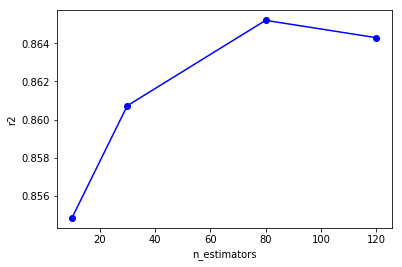

In [92]:

x_plot = list(gs.cv_results_['param_model__n_estimators'])
y_plot = list(gs.cv_results_['mean_test_score'])
plt.plot(x_plot, y_plot, 'bo-');
plt.xlabel('n_estimators')
plt.ylabel('r2')

#print(gs.cv_results_)

In [93]:
model = gs.best_estimator_
#model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=80, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [95]:
print('r2 test:', model.score(X_test, y_test))

r2 test: 0.8585002579127522


In [97]:
cv = 10
metric = 'r2'
print_cv_metric(model=model, cv=cv, metric=metric)

Train r2 metric:
result 10 kfold [0.85899529 0.86823094 0.86937948 0.87413884 0.88250597 0.79899022
 0.89216661 0.86374274 0.87113175 0.89104793]
mean:0.87, +/-:0.02
--------------------------------------------------
Testr2 metric:
result kfold [0.85899529 0.86823094 0.86937948 0.87413884 0.88250597 0.79899022
 0.89216661 0.86374274 0.87113175 0.89104793]
mean:0.85, +/-:0.05


In [ ]:
# Train r2 metric: mean:0.87, +/-:0.02
# Test r2 metric: mean:0.85, +/-:0.05

## GradientBoostingRegressor

In [112]:
model = GradientBoostingRegressor()

pipe_model = Pipeline([
                    ('model', model)
                    ])

param_grid = [{'model__loss':['ls'],
              'model__n_estimators':[50, 100, 200, 300, 500], 
              'model__learning_rate':[0.01, 0.1, 0.5, 1],
              }]

gs = GridSearchCV(estimator=pipe_model,
                 param_grid=param_grid,
                 scoring='r2',
                 cv=10,
                 n_jobs=1)

gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8830829142498782
{'model__learning_rate': 0.1, 'model__loss': 'ls', 'model__n_estimators': 500}


In [120]:
# best score: 0.8830829142498782
# best params; {'model__learning_rate': 0.1, 'model__loss': 'ls', 'model__n_estimators': 500}

In [113]:
#gs.cv_results_

In [114]:
model = gs.best_estimator_
#model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('model',
                 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                           init=None, learning_rate=0.1,
                                           loss='ls', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=500,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=None,
                                           subsample=1.0, tol=0

In [117]:
cv = 10
metric = 'r2'
print_cv_metric(model=model, cv=cv, metric=metric)

Train r2 metric:
result 10 kfold [0.87548149 0.8557039  0.89754921 0.89222874 0.89735454 0.81306353
 0.91345508 0.88877754 0.89059057 0.906613  ]
mean:0.88, +/-:0.03
--------------------------------------------------
Testr2 metric:
result kfold [0.87548149 0.8557039  0.89754921 0.89222874 0.89735454 0.81306353
 0.91345508 0.88877754 0.89059057 0.906613  ]
mean:0.87, +/-:0.04


In [ ]:
# Train r2 metric: mean:0.88, +/-:0.03
# Test r2 metric: mean:0.87, +/-:0.04

In [118]:
cv = 10
metric = 'neg_mean_absolute_error'
print_cv_metric(model=model, cv=cv, metric=metric)

Train neg_mean_absolute_error metric:
result 10 kfold [-72746.87270196 -74394.23497464 -69884.39704608 -68382.06771031
 -67595.83557202 -72422.98749658 -69865.06421632 -74924.41847041
 -66798.54710696 -67256.24883405]
mean:-70427.07, +/-:2852.34
--------------------------------------------------
Testneg_mean_absolute_error metric:
result kfold [-72746.87270196 -74394.23497464 -69884.39704608 -68382.06771031
 -67595.83557202 -72422.98749658 -69865.06421632 -74924.41847041
 -66798.54710696 -67256.24883405]
mean:-70471.41, +/-:5891.63


In [ ]:
# Train MAE metric: mean:-70427.07, +/-:2852.34
# Test MAE metric: mean:-70471.41, +/-:5891.63

In [ ]:
# RandomSearch, GridSearch, only r2score applied, no cross_validation, no data_exploration

In [1]:
# Good results analysis